# 1. Clasificación Binaria

## Clasificación por nivel de experiencia

### 1. La variable 'experience_level' clasifica a los empleados en:
   
- EN: Entry-level (nivel de entrada)
- MI: Mid-level (nivel medio)
- SE: Seniorv (mas que medio)
- EX: Executive (alta dirección)

### 2. Clasificación binaria:

Grupo 0: EN y MI → poca o mediana experiencia
Grupo 1: SE y EX → mucha experiencia

### 3. ¿Para qué sirve?
   
Este modelo permite predecir si un perfil es de alta experiencia, basándose en variables como:
- employment_type (tipo de contrato)
- job_title o job_group (tipo de cargo)
- company_size (tamaño de empresa)
- remote_ratio o is_remote (nivel de trabajo remoto)
- company_location y employee_residence (ubicación)
- salary_in_usd
  
### 4. Aplicación real:
- Sistemas de recomendación de empleo
- Clasificación automática de candidatos por experiencia

### ✅ Tipos de datos con los que funciona mejor la regresión logística

#### 1. Variables predictoras numéricas (escaladas)

Ejemplos: edad, ingresos, años de experiencia, calificaciones

Por qué funcionan bien: la regresión logística modela una función sigmoidal sobre estas variables; si están escaladas, el modelo converge más rápido y es más estable.

#### 2. Variables categóricas (codificadas en One-Hot o similar)

Ejemplos: tipo de contrato, sector, ubicación, tamaño de empresa

-  Importante: deben estar codificadas en valores numéricos. Lo ideal es usar:

- OneHotEncoder para variables sin orden lógico

- OrdinalEncoder si hay un orden entre las categorías

#### 3 Escalar valores numéricos, si el modelo es matemático

Porque esos modelos dependen de:

* distancias
* ecuaciones
* pesos/coeficientes
* optimización numéricas
* funciones matemáticas internas.

Y todo eso se distorsiona si las variables están en escalas muy distintas.

#### 4. Variables sin multicolinealidad alta
Si hay alta correlación entre variables, el modelo puede volverse inestable. Se recomienda eliminar o combinar variables redundantes.

#### 5. Datos sin muchos valores atípicos extremos
Valores extremos pueden afectar negativamente los coeficientes. Puede ser útil usar transformaciones como logaritmos o aplicar técnicas de detección de outliers.

**⚠️ Evitar usar con...**
Relaciones no lineales complejas: la regresión logística no captura bien patrones no lineales (usa modelos como árboles, redes o SVM en ese caso).

Variables con muchas clases en categóricas: pueden generar demasiadas columnas si haces One-Hot, volviendo el modelo más complejo e ineficiente.

**🎯 Recomendaciones prácticas**
* Escala los datos numéricos: con StandardScaler o MinMaxScaler.
* Codifica los datos categóricos: con OneHotEncoder o similar.
* Evita multicolinealidad: con df.corr() o VIF para detectar redundancia.
* Normaliza la variable objetivo: debe ser binaria (0/1) para regresión logística clásica.







## 1.1 Importar librerías

In [232]:
#visualizacion
import seaborn as sns
import matplotlib.pyplot as plt
#data
import pandas as pd
import numpy as np
#machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.multiclass import unique_labels
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# almacenar modelos
import joblib
#conectarse
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1.2 Data
*Para este contexto se utilizara la data cruda*
Y realizaremos de manera muy rápida la exploración y limpieza

In [197]:
df= pd.read_csv("/content/drive/MyDrive/CODIGOS _ia/ds_salaries.csv")
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 64 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   work_year                                     607 non-null    int64   
 1   experience_level                              607 non-null    category
 2   employment_type                               607 non-null    object  
 3   job_title                                     607 non-null    object  
 4   salary_in_usd                                 607 non-null    int64   
 5   employee_residence                            607 non-null    object  
 6   remote_ratio                                  607 non-null    int64   
 7   company_location                              607 non-null    object  
 8   company_size                                  607 non-null    category
 9   salary_class                                  607 non-

In [199]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


### 1.2.1 Variable objetivo

In [234]:
#convertir variable objetivo
df["experience_group"] = df["experience_level"].map({"EN": 0, "MI": 0, "SE": 1, "EX": 1})
# Crear variable objetivo binaria
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size', 'salary_class', 'job_title_lower',
       'job_3d computer vision researcher', 'job_ai scientist',
       'job_analytics engineer', 'job_applied data scientist',
       'job_applied machine learning scientist', 'job_bi data analyst',
       'job_big data architect', 'job_big data engineer',
       'job_business data analyst', 'job_cloud data engineer',
       'job_computer vision engineer', 'job_computer vision software engineer',
       'job_data analyst', 'job_data analytics engineer',
       'job_data analytics lead', 'job_data analytics manager',
       'job_data architect', 'job_data engineer',
       'job_data engineering manager', 'job_data science consultant',
       'job_data science engineer', 'job_data science manager',
       'job_data scientist', 'job_data specialist',
       'job_director of data e

### 1.2.2 Balance de las clases

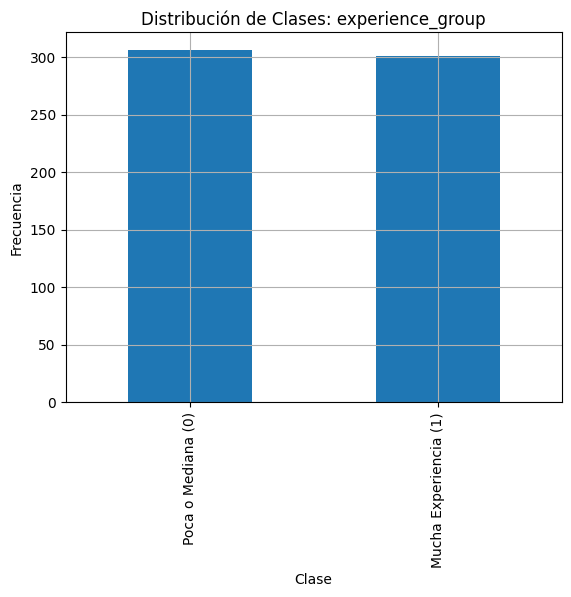

Conteo por clase:
 experience_group
1    306
0    301
Name: count, dtype: int64

Proporciones:
 experience_group
1    0.504119
0    0.495881
Name: proportion, dtype: float64


In [201]:
# Revisar el balance de clases

# Conteo de clases
df["experience_group"].value_counts().plot(kind='bar')
plt.title("Distribución de Clases: experience_group")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.xticks(ticks=[0, 1], labels=["Poca o Mediana (0)", "Mucha Experiencia (1)"])
plt.grid(True)
plt.show()

# imprimir los valores absolutos y proporciones
print("Conteo por clase:\n", df["experience_group"].value_counts())
print("\nProporciones:\n", df["experience_group"].value_counts(normalize=True))

### 1.2.3 Correlacción entre variables

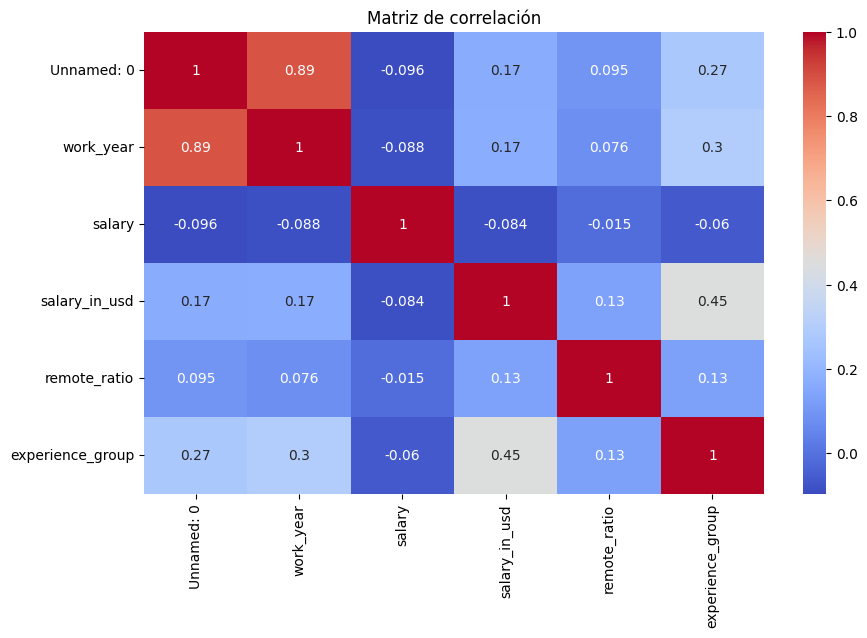

In [202]:
corr= df.corr(numeric_only=True) #hallar valor
# graficarlo
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

In [235]:
#eliminar columnas
df = df.drop(columns=["Unnamed: 0", "salary", "salary_currency"])

KeyError: "['Unnamed: 0', 'salary', 'salary_currency'] not found in axis"

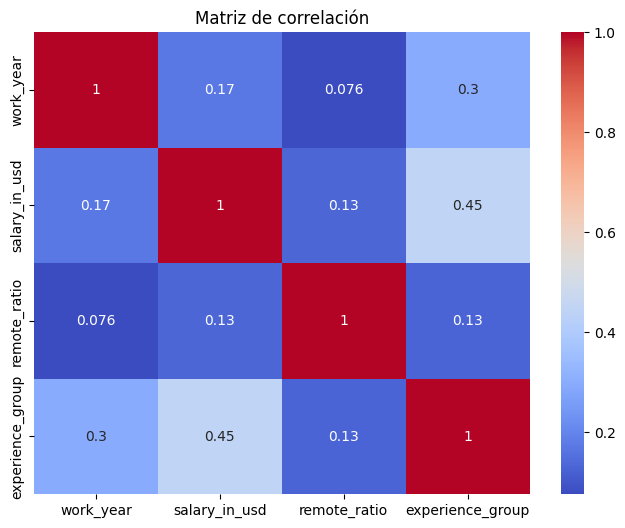

In [204]:
corr= df.corr(numeric_only=True) #hallar valor
# graficarlo
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

Dada la matrix decido no transformar variables y solo escalar las numericas, y no vectorizar otras.

### 1.2.4 Separar y partir datos

In [ ]:
X = df[["work_year", "salary_in_usd", "remote_ratio"] ]
y = df["experience_group"]

In [206]:
X

,work_year,salary_in_usd,remote_ratio
0,2020,79833,0
1,2020,260000,0
2,2020,109024,50
3,2020,20000,0
4,2020,150000,50
...,...,...,...
602,2022,154000,100
603,2022,126000,100
604,2022,129000,0
605,2022,150000,100


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)


### 1.2.5 Escalar datos de train y test

In [ ]:
cols_numericas = ["work_year", "salary_in_usd", "remote_ratio"] # las variables a escalar
scaler = StandardScaler() # objeto que escala
X_train[cols_numericas] = scaler.fit_transform(X_train[cols_numericas]) # train
X_test[cols_numericas]  = scaler.transform(X_test[cols_numericas]) # test


## 1.3 Modelo: regresor logístico

In [ ]:
#crear modelo
modelo = LogisticRegression(max_iter=300)
#entrenar modelo
modelo.fit(X_train, y_train)

# predicciones en train y test para verificar overfitting
y_pred_train = modelo.predict(X_train)
y_pred_test  = modelo.predict(X_test)

#matriz de confusion
mc= confusion_matrix(y_test, y_pred_test)

In [ ]:
# métricas
print("Accuracy train:", accuracy_score(y_train, y_pred_train))
print("Accuracy test :", accuracy_score(y_test, y_pred_test))

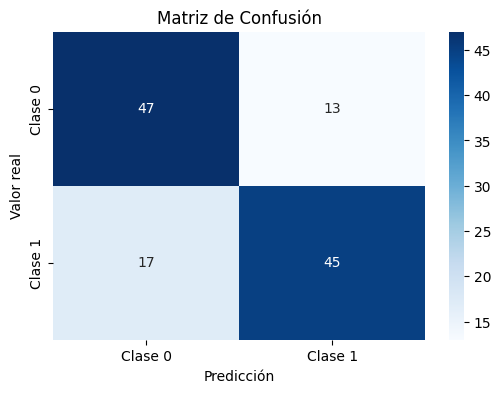

In [211]:

# Graficar
plt.figure(figsize=(6, 4))
sns.heatmap(mc, annot=True, fmt="d", cmap="Blues", xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de Confusión")
plt.show()


In [ ]:

print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred_test))
print("=" * 40 + "\n")

## 1.4 Almacenar modelo  de clasificación

In [ ]:
joblib.dump(modelo, "/content/drive/MyDrive/CODIGOS _ia/clasificacionBinaria.pkl")

In [ ]:
df.to_csv("/content/drive/MyDrive/CODIGOS _ia/data_preprocesada4_sin_scaler.csv", index=False)


# 2. Clasificación multiclase

**Objetivo:**

Construir un modelo de clasificación multiclase para **predecir el nivel salarial de un profesional en ciencia de datos, según características laborales (tipo de empleo, título del cargo, tamaño de la empresa, trabajo remoto, etc.).**

Vamos a convertir el salario continuo en 3 clases, usando umbrales basados en los percentiles actuales de la data:

* Salario Bajo → salario ≤ P33
* Salario Medio → P33 < salario ≤ P66
* Salario Alto → salario > P66

**Es importante tener en cuenta que una vez se apliquen los umbrales para la definición del modelo, los valores que queden asociados a ellos deben quedar fijos como parámetros para luego definir la categoria del salario: por ejemplo, si para el p33 se da el valor 5000, de ahora en adelante todo valor que entre por debajo de este será catalogaso como rango de salario bajo.**

## 2.1 Librerías

In [ ]:
#visualizacion
import seaborn as sns
import matplotlib.pyplot as plt
#data
import pandas as pd
import numpy as np
#machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.multiclass import unique_labels
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# almacenar modelos
import joblib
#conectarse
from google.colab import drive
drive.mount('/content/drive')


## 2.2 Data

In [216]:
df= pd.read_csv("/content/drive/MyDrive/CODIGOS _ia/ds_salaries.csv")
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [217]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [ ]:
df.info()

### 2.1.1 Exploración y conversión de la variable objetivo

count       607.000000
mean     112297.869852
std       70957.259411
min        2859.000000
25%       62726.000000
50%      101570.000000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64


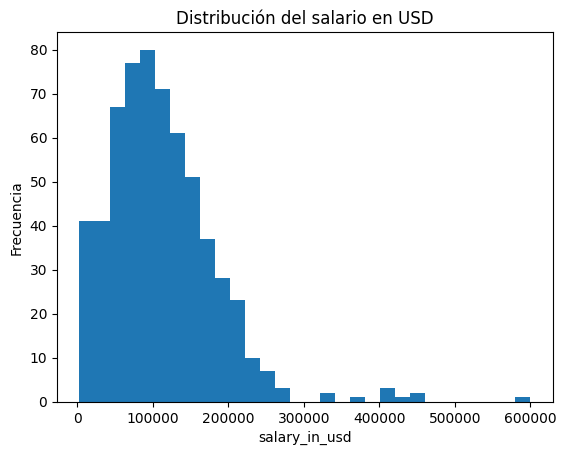

In [219]:
# Estadísticos básicos de salary_in_usd
print(df['salary_in_usd'].describe())

# Histograma para ver la distribución del salario (opcional para la clase)
plt.figure()
plt.hist(df['salary_in_usd'], bins=30)
plt.xlabel('salary_in_usd')
plt.ylabel('Frecuencia')
plt.title('Distribución del salario en USD')
plt.show()


In [ ]:
# hallar los percentiles 33 y 66 para encontrar los umbrales

#  Calcular P33 y P66 del salario
p33 = df['salary_in_usd'].quantile(0.33)
p66 = df['salary_in_usd'].quantile(0.66)

print("Percentil 33:", p33)
print("Percentil 66:", p66)

In [ ]:
# fijar estos umbrales
UMBRAL_BAJO = 76940
UMBRAL_MEDIO = 130000

def clasificar_salario_umbral_fijo(salario):
    if salario <= UMBRAL_BAJO:
        return 'bajo'
    elif salario <= UMBRAL_MEDIO:
        return 'medio'
    else:
        return 'alto'

df['salary_class'] = df['salary_in_usd'].apply(clasificar_salario_umbral_fijo)

print(df['salary_class'].value_counts())
print("_"*50)
print(df['salary_class'].value_counts(normalize=True))


### 2.1.2 Balance de las clases

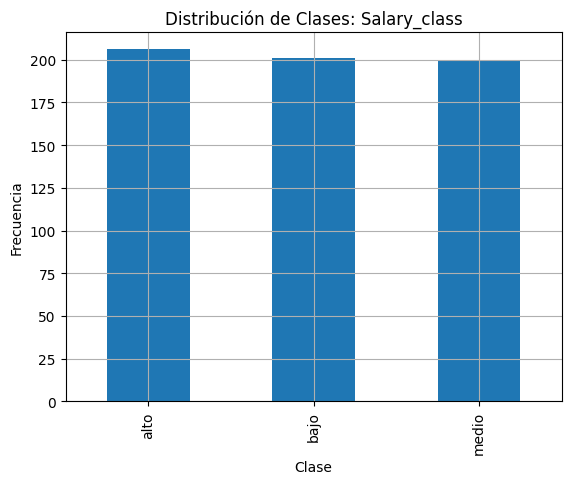

In [222]:
# Conteo de clases
df["salary_class"].value_counts().plot(kind='bar')
plt.title("Distribución de Clases: Salary_class")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.xticks()
plt.grid(True)
plt.show()



### 2.1.4 Eliminar columnas que no aportan

In [ ]:
df.columns

In [ ]:
df  = df.drop(columns=["Unnamed: 0", "salary", "salary_currency"])

In [ ]:
df.columns

In [226]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_class
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L,medio
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S,alto
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M,medio
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S,bajo
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L,alto


### 2.1.5 Transformar columnas

**En la práctica real, las anteriores variables anteriores son importantes en terminos de definición de un salaraio alto, medio o bajo; para ello vamos a tomar ALGUNAS variables y las vamos a preprocesar en los casos que sean necesario, de la siguiente forma:**

1. Las numéricas las escalamos con standarscaler (SI ES EL CASO)
2. Variables como "job_title" los vectorizamos con One Hot Encoding pero antes convertimos a minúscula sus textos
3. Resto de variables cualititativas con orden le aplicamos ordinalEncoding

In [227]:

#. Convertir job_title a minúsculas

df["job_title_lower"] = df["job_title"].str.lower()
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_class,job_title_lower
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L,medio,data scientist
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S,alto,machine learning scientist
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M,medio,big data engineer
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S,bajo,product data analyst
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L,alto,machine learning engineer


In [228]:
#  Crear dummies con pandas
job_dummies = pd.get_dummies(df["job_title_lower"], prefix="job", dtype=int)

#Unir las dummies al dataframe original
# ------------------------------
df = pd.concat([df, job_dummies], axis=1)
df


,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_class,...,job_machine learning scientist,job_marketing data analyst,job_ml engineer,job_nlp engineer,job_principal data analyst,job_principal data engineer,job_principal data scientist,job_product data analyst,job_research scientist,job_staff data scientist
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L,medio,...,0,0,0,0,0,0,0,0,0,0
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S,alto,...,1,0,0,0,0,0,0,0,0,0
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M,medio,...,0,0,0,0,0,0,0,0,0,0
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S,bajo,...,0,0,0,0,0,0,0,1,0,0
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L,alto,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,US,100,US,M,alto,...,0,0,0,0,0,0,0,0,0,0
603,2022,SE,FT,Data Engineer,126000,US,100,US,M,medio,...,0,0,0,0,0,0,0,0,0,0
604,2022,SE,FT,Data Analyst,129000,US,0,US,M,medio,...,0,0,0,0,0,0,0,0,0,0
605,2022,SE,FT,Data Analyst,150000,US,100,US,M,alto,...,0,0,0,0,0,0,0,0,0,0


In [229]:
#transformar variables con orden

# ---------------------------
# 1. Definir órdenes
# ---------------------------
exp_order = ['EN', 'MI', 'SE', 'EX']
size_order = ['S', 'M', 'L']
salary_order = ['bajo', 'medio', 'alto']


# ---------- CONVERTIR A CATEGORÍA ORDENADA ----------
df['experience_level'] = pd.Categorical(df['experience_level'],
                                        categories=exp_order,
                                        ordered=True)

df['company_size'] = pd.Categorical(df['company_size'],
                                    categories=size_order,
                                    ordered=True)

df['salary_class'] = pd.Categorical(df['salary_class'],
                                    categories=salary_order,
                                    ordered=True)

# ---------- OBTENER CÓDIGOS ORDINALES ----------
df['experience_level_ord'] = df['experience_level'].cat.codes
df['company_size_ord'] = df['company_size'].cat.codes
df['salary_class_ord'] = df['salary_class'].cat.codes

df[['experience_level', 'experience_level_ord',
    'company_size', 'company_size_ord',
    'salary_class', 'salary_class_ord']].head()



,experience_level,experience_level_ord,company_size,company_size_ord,salary_class,salary_class_ord
0,MI,1,L,2,medio,1
1,SE,2,S,0,alto,2
2,SE,2,M,1,medio,1
3,MI,1,S,0,bajo,0
4,SE,2,L,2,alto,2


In [236]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size', 'salary_class', 'job_title_lower',
       'job_3d computer vision researcher', 'job_ai scientist',
       'job_analytics engineer', 'job_applied data scientist',
       'job_applied machine learning scientist', 'job_bi data analyst',
       'job_big data architect', 'job_big data engineer',
       'job_business data analyst', 'job_cloud data engineer',
       'job_computer vision engineer', 'job_computer vision software engineer',
       'job_data analyst', 'job_data analytics engineer',
       'job_data analytics lead', 'job_data analytics manager',
       'job_data architect', 'job_data engineer',
       'job_data engineering manager', 'job_data science consultant',
       'job_data science engineer', 'job_data science manager',
       'job_data scientist', 'job_data specialist',
       'job_director of data e

### 2.1.6 Seleccionar variables

In [240]:

X = df.drop(
    ['experience_level', 'employment_type', 'job_title', 'salary_in_usd',
     'employee_residence', 'company_location', 'company_size',
     'salary_class', 'job_title_lower', 'salary_class_ord'],
    axis=1,
    errors='ignore'
)

y = df['salary_class_ord']


In [241]:
X

,work_year,remote_ratio,job_3d computer vision researcher,job_ai scientist,job_analytics engineer,job_applied data scientist,job_applied machine learning scientist,job_bi data analyst,job_big data architect,job_big data engineer,...,job_nlp engineer,job_principal data analyst,job_principal data engineer,job_principal data scientist,job_product data analyst,job_research scientist,job_staff data scientist,experience_level_ord,company_size_ord,experience_group
0,2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,0
1,2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,1
2,2020,50,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,2,1,1
3,2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,2020,50,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,100,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,1
603,2022,100,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,1
604,2022,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,1
605,2022,100,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,1


In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

## 2.3 Aplicar modelos

Nuestro dataset está correctamente preparado para KNN, Random Forest y SVM, porque:

* Las variables numéricas están listas.
* Las variables categóricas con orden fueron convertidas a ordinal encoding.
* Las variables categóricas nominales fueron convertidas a One-Hot encoding.

Ahora sí podemos aplicar los modelos.

 KNN Accuracy: 0.5327868852459017
              precision    recall  f1-score   support

           0       0.46      0.57      0.51        40
           1       0.41      0.40      0.41        40
           2       0.79      0.62      0.69        42

    accuracy                           0.53       122
   macro avg       0.55      0.53      0.54       122
weighted avg       0.56      0.53      0.54       122



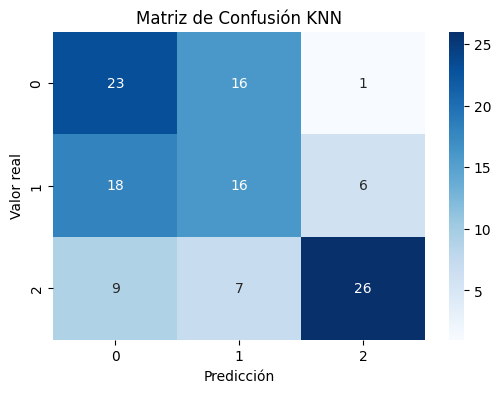

In [247]:
# Crear el modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenar
knn.fit(X_train, y_train)

# Predecir
y_pred_knn = knn.predict(X_test)

# Resultados
print(" KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

#matriz de confusion
mc= confusion_matrix(y_test, y_pred_knn)
# Graficar
plt.figure(figsize=(6, 4))
sns.heatmap(mc, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de Confusión KNN")
plt.show()



 Random Forest Accuracy: 0.5737704918032787
              precision    recall  f1-score   support

           0       0.54      0.62      0.58        40
           1       0.40      0.35      0.37        40
           2       0.76      0.74      0.75        42

    accuracy                           0.57       122
   macro avg       0.57      0.57      0.57       122
weighted avg       0.57      0.57      0.57       122



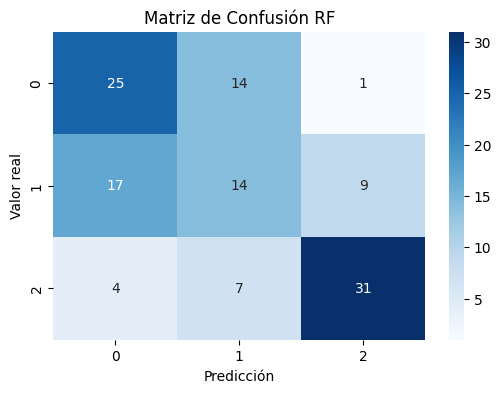

In [248]:
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print(" Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
#matriz de confusion
mc= confusion_matrix(y_test, y_pred_rf)
# Graficar
plt.figure(figsize=(6, 4))
sns.heatmap(mc, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de Confusión RF")
plt.show()



 SVM Accuracy: 0.3442622950819672
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.00      0.00      0.00        40
           2       0.34      1.00      0.51        42

    accuracy                           0.34       122
   macro avg       0.11      0.33      0.17       122
weighted avg       0.12      0.34      0.18       122



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


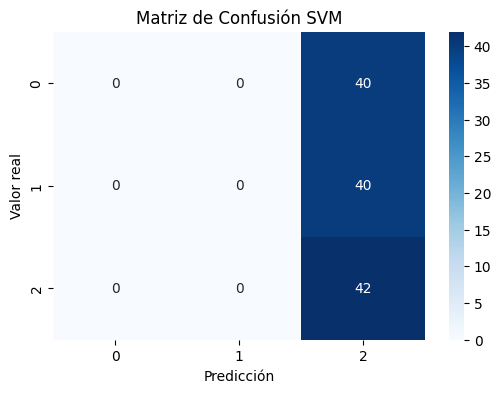

In [250]:

svm_clf = SVC(kernel='poly')

svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)

print(" SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
#matriz de confusion
mc= confusion_matrix(y_test, y_pred_svm)
# Graficar
plt.figure(figsize=(6, 4))
sns.heatmap(mc, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de Confusión SVM")
plt.show()

In [251]:
X = df.drop(
    ['experience_level', 'employment_type', 'job_title', 'salary_in_usd',
     'employee_residence', 'company_location', 'company_size',
     'salary_class', 'job_title_lower', 'salary_class_ord'],
    axis=1,
    errors='ignore'
)

y = df['salary_class_ord']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm = SVC(kernel='rbf', C=1, gamma='scale')
svm.fit(X_train_scaled, y_train)

y_pred = svm.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6229508196721312
              precision    recall  f1-score   support

           0       0.60      0.85      0.70        40
           1       0.53      0.25      0.34        40
           2       0.70      0.76      0.73        42

    accuracy                           0.62       122
   macro avg       0.61      0.62      0.59       122
weighted avg       0.61      0.62      0.59       122



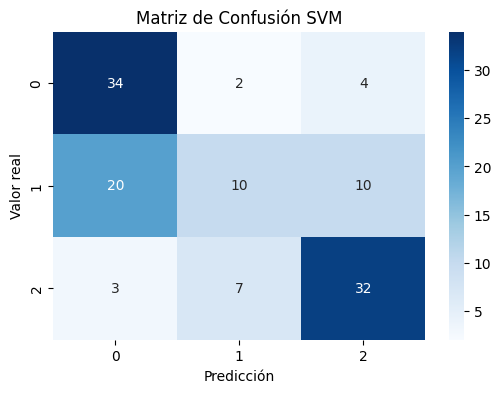

In [252]:
#matriz de confusion
mc= confusion_matrix(y_test, y_pred)
# Graficar
plt.figure(figsize=(6, 4))
sns.heatmap(mc, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de Confusión SVM")
plt.show()